#Einführung und Problemstellung

Die Untersuchung basiert auf der Analyse von studentischen Ausgaben, um mögliche Zusammenhänge zwischen verschiedenen Faktoren und finanziellen Verhaltensweisen zu identifizieren. Die folgenden Fragestellungen wurden gewählt, um ein besseres Verständnis der Ausgabemuster unter Studierenden zu gewinnen:


- Gibt es einen Zusammenhang zwischen dem Studiengang und dem Ausgabeverhalten?

- Besteht ein Zusammenhang zwischen dem Alter und den Einkommensquellen?

- Hängen die Ausgaben für Verkehrsmittel mit den Ausgaben für Wohnen zusammen?

#Importieren von Daten und Bibliotheken

---



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests #für API
import math
from sklearn.cluster import KMeans #K-Clustering
import statsmodels.api as sm #Regression
import scipy.stats as stats #t-test


df = pd.read_csv('/content/sample_data/Student Spending Habits.csv')
df.shape

(1000, 18)

In [7]:
df.head()

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card


#Übersetzung und Währungsumrechnung

Zu Beginn wurde der Datensatz übersetzt und die Währung umgerechnet, um den Datensatz besser zu verstehen und ihn für einen späteren Vergleich mit Daten aus Deutschland vorzubereiten.

In [8]:
pd.set_option('display.max_columns', None)
df.head(10)

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card
5,5,25,Non-binary,Sophomore,Computer Science,523,790,3151,413,386,122,131,73,38,234,108,99,Mobile Payment App
6,6,23,Female,Freshman,Engineering,1354,69,4973,812,398,101,213,21,38,157,117,48,Credit/Debit Card
7,7,23,Female,Junior,Economics,631,748,3966,571,269,92,251,37,90,152,56,62,Mobile Payment App
8,8,22,Non-binary,Senior,Computer Science,1402,248,5638,599,354,82,155,123,41,162,172,194,Credit/Debit Card
9,9,18,Female,Junior,Computer Science,1423,74,3977,626,249,117,123,51,74,243,34,196,Mobile Payment App


In [9]:
df.columns

Index(['Unnamed: 0', 'age', 'gender', 'year_in_school', 'major',
       'monthly_income', 'financial_aid', 'tuition', 'housing', 'food',
       'transportation', 'books_supplies', 'entertainment', 'personal_care',
       'technology', 'health_wellness', 'miscellaneous',
       'preferred_payment_method'],
      dtype='object')

In [10]:
df.dtypes

,0
Unnamed: 0,int64
age,int64
gender,object
year_in_school,object
major,object
monthly_income,int64
financial_aid,int64
tuition,int64
housing,int64
food,int64


Die "Unnamed" Säule wurde als für das gestellte Problem unrelevant entfernt.

In [11]:
df.drop('Unnamed: 0', inplace=True, axis=1)

##Übersetzung

In [12]:
df.rename(columns={
    'age': 'Alter',
    'gender': 'Geschlecht',
    'year_in_school': 'Studienjahr',
    'major': 'Studiengang',
    'monthly_income': 'Monatliches Einkommen',
    'financial_aid': 'Finanzielle Unterstützung',
    'tuition': 'Studiengebühren',
    'housing': 'Unterkunft',
    'food': 'Nahrung',
    'transportation': 'Transport',
    'books_supplies': 'Bücher und Materialien',
    'entertainment': 'Unterhaltung',
    'personal_care': 'Persönliche Pflege',
    'technology': 'Technologie',
    'health_wellness': 'Gesundheit',
    'miscellaneous': 'Sonstiges',
    'preferred_payment_method' : 'Zahlungsmethode'
}, inplace=True)



In [13]:
df.columns

Index(['Alter', 'Geschlecht', 'Studienjahr', 'Studiengang',
       'Monatliches Einkommen', 'Finanzielle Unterstützung', 'Studiengebühren',
       'Unterkunft', 'Nahrung', 'Transport', 'Bücher und Materialien',
       'Unterhaltung', 'Persönliche Pflege', 'Technologie', 'Gesundheit',
       'Sonstiges', 'Zahlungsmethode'],
      dtype='object')

In [14]:
values = df['Geschlecht'].value_counts()
print('-- 1.', values)

values = df['Studienjahr'].value_counts()
print('-- 2.',values)

values = df['Studiengang'].value_counts()
print('-- 3.',values)

-- 1. Geschlecht
Male          356
Female        323
Non-binary    321
Name: count, dtype: int64
-- 2. Studienjahr
Senior       254
Freshman     253
Junior       247
Sophomore    246
Name: count, dtype: int64
-- 3. Studiengang
Biology             228
Economics           204
Computer Science    192
Engineering         192
Psychology          184
Name: count, dtype: int64


In [15]:
df['Geschlecht'] = df['Geschlecht'].apply(lambda x: 'Mähnlich' if x == 'Male' else ('Weiblich' if x=='Female' else 'Divers'))
df

,Alter,Geschlecht,Studienjahr,Studiengang,Monatliches Einkommen,Finanzielle Unterstützung,Studiengebühren,Unterkunft,Nahrung,Transport,Bücher und Materialien,Unterhaltung,Persönliche Pflege,Technologie,Gesundheit,Sonstiges,Zahlungsmethode
0,19,Divers,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,24,Weiblich,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,24,Divers,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,23,Weiblich,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,20,Weiblich,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,Weiblich,Senior,Biology,1346,520,3688,969,152,194,151,42,38,252,65,163,Cash
996,19,Weiblich,Senior,Biology,1407,560,3380,508,265,52,206,40,98,274,84,135,Mobile Payment App
997,20,Mähnlich,Junior,Economics,957,393,3497,723,339,139,69,112,46,284,57,28,Mobile Payment App
998,22,Divers,Senior,Economics,1174,612,3649,543,237,123,200,129,90,190,101,65,Mobile Payment App


In [16]:
def map_studienjahr(x):
    if x == 'Senior':
        return '4. Jahr'
    elif x == 'Junior':
        return '3. Jahr'
    elif x == 'Sophomore':
        return '2. Jahr'
    elif x == 'Freshman':
        return '1. Jahr'
    else:
        return 'Unbekannt'

df['Studienjahr'] = df['Studienjahr'].apply(map_studienjahr)
df


,Alter,Geschlecht,Studienjahr,Studiengang,Monatliches Einkommen,Finanzielle Unterstützung,Studiengebühren,Unterkunft,Nahrung,Transport,Bücher und Materialien,Unterhaltung,Persönliche Pflege,Technologie,Gesundheit,Sonstiges,Zahlungsmethode
0,19,Divers,1. Jahr,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,24,Weiblich,3. Jahr,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,24,Divers,3. Jahr,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,23,Weiblich,4. Jahr,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,20,Weiblich,4. Jahr,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,Weiblich,4. Jahr,Biology,1346,520,3688,969,152,194,151,42,38,252,65,163,Cash
996,19,Weiblich,4. Jahr,Biology,1407,560,3380,508,265,52,206,40,98,274,84,135,Mobile Payment App
997,20,Mähnlich,3. Jahr,Economics,957,393,3497,723,339,139,69,112,46,284,57,28,Mobile Payment App
998,22,Divers,4. Jahr,Economics,1174,612,3649,543,237,123,200,129,90,190,101,65,Mobile Payment App


In [17]:
df['Zahlungsmethode'] = df['Zahlungsmethode'].replace({
    'Mobile Payment App': 'Mobile Payment',
    'Credit/Debit Card': 'Kredit-/Debitkarte',
    'Cash': 'Bargeld'
})

In [18]:
def map_fach(x):
    if x == 'Biology':
        return 'Biologie'
    elif x == 'Economics':
        return 'Wirtschaftswissenschaft'
    elif x == 'Computer Science':
        return 'Informatik'
    elif x == 'Engineering':
        return 'Ingenieurwissenschaften'
    elif x == 'Psychology':
        return 'Psychologie'
    else:
        return 'Unbekannt'

df['Studiengang'] = df['Studiengang'].apply(map_fach)
df

,Alter,Geschlecht,Studienjahr,Studiengang,Monatliches Einkommen,Finanzielle Unterstützung,Studiengebühren,Unterkunft,Nahrung,Transport,Bücher und Materialien,Unterhaltung,Persönliche Pflege,Technologie,Gesundheit,Sonstiges,Zahlungsmethode
0,19,Divers,1. Jahr,Psychologie,958,270,5939,709,296,123,188,41,78,134,127,72,Kredit-/Debitkarte
1,24,Weiblich,3. Jahr,Wirtschaftswissenschaft,1006,875,4908,557,365,85,252,74,92,226,129,68,Kredit-/Debitkarte
2,24,Divers,3. Jahr,Wirtschaftswissenschaft,734,928,3051,666,220,137,99,130,23,239,112,133,Bargeld
3,23,Weiblich,4. Jahr,Informatik,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment
4,20,Weiblich,4. Jahr,Informatik,810,522,3887,825,372,168,194,48,71,88,71,104,Kredit-/Debitkarte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,Weiblich,4. Jahr,Biologie,1346,520,3688,969,152,194,151,42,38,252,65,163,Bargeld
996,19,Weiblich,4. Jahr,Biologie,1407,560,3380,508,265,52,206,40,98,274,84,135,Mobile Payment
997,20,Mähnlich,3. Jahr,Wirtschaftswissenschaft,957,393,3497,723,339,139,69,112,46,284,57,28,Mobile Payment
998,22,Divers,4. Jahr,Wirtschaftswissenschaft,1174,612,3649,543,237,123,200,129,90,190,101,65,Mobile Payment


##Währungsumrechnung

Um die Aktualität der Daten zu gewährleisten, wurde die Währung mithilfe einer API umgerechnet.

In [19]:
!pip install requests

In [20]:
df.columns

Index(['Alter', 'Geschlecht', 'Studienjahr', 'Studiengang',
       'Monatliches Einkommen', 'Finanzielle Unterstützung', 'Studiengebühren',
       'Unterkunft', 'Nahrung', 'Transport', 'Bücher und Materialien',
       'Unterhaltung', 'Persönliche Pflege', 'Technologie', 'Gesundheit',
       'Sonstiges', 'Zahlungsmethode'],
      dtype='object')

In [21]:
url = f"https://v6.exchangerate-api.com/v6/26d3c133f99e2efbb343bbcd/latest/USD" #API-Schlüssel

response = requests.get(url) #API-Anfrage
data = response.json()

wechselkurs = data['conversion_rates']['EUR']
print(wechselkurs)

def currency(x):
    return round(x * wechselkurs, 1)


for i in range(4, 15):
    df[df.columns[i]] = df[df.columns[i]].apply(currency)

df

0.8779


,Alter,Geschlecht,Studienjahr,Studiengang,Monatliches Einkommen,Finanzielle Unterstützung,Studiengebühren,Unterkunft,Nahrung,Transport,Bücher und Materialien,Unterhaltung,Persönliche Pflege,Technologie,Gesundheit,Sonstiges,Zahlungsmethode
0,19,Divers,1. Jahr,Psychologie,841.0,237.0,5213.8,622.4,259.9,108.0,165.0,36.0,68.5,117.6,111.5,72,Kredit-/Debitkarte
1,24,Weiblich,3. Jahr,Wirtschaftswissenschaft,883.2,768.2,4308.7,489.0,320.4,74.6,221.2,65.0,80.8,198.4,113.2,68,Kredit-/Debitkarte
2,24,Divers,3. Jahr,Wirtschaftswissenschaft,644.4,814.7,2678.5,584.7,193.1,120.3,86.9,114.1,20.2,209.8,98.3,133,Bargeld
3,23,Weiblich,4. Jahr,Informatik,541.7,232.6,4332.4,572.4,253.7,100.1,195.8,86.9,26.3,143.1,92.2,55,Mobile Payment
4,20,Weiblich,4. Jahr,Informatik,711.1,458.3,3412.4,724.3,326.6,147.5,170.3,42.1,62.3,77.3,62.3,104,Kredit-/Debitkarte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,Weiblich,4. Jahr,Biologie,1181.7,456.5,3237.7,850.7,133.4,170.3,132.6,36.9,33.4,221.2,57.1,163,Bargeld
996,19,Weiblich,4. Jahr,Biologie,1235.2,491.6,2967.3,446.0,232.6,45.7,180.8,35.1,86.0,240.5,73.7,135,Mobile Payment
997,20,Mähnlich,3. Jahr,Wirtschaftswissenschaft,840.2,345.0,3070.0,634.7,297.6,122.0,60.6,98.3,40.4,249.3,50.0,28,Mobile Payment
998,22,Divers,4. Jahr,Wirtschaftswissenschaft,1030.7,537.3,3203.5,476.7,208.1,108.0,175.6,113.2,79.0,166.8,88.7,65,Mobile Payment


#Explorative Datenanalyse (EDA)

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
#Der Datensatz wurde bereits bereinigt, keine weiteren Schritte erforderlich
df.isnull().sum()

,0
Alter,0
Geschlecht,0
Studienjahr,0
Studiengang,0
Monatliches Einkommen,0
Finanzielle Unterstützung,0
Studiengebühren,0
Unterkunft,0
Nahrung,0
Transport,0


In [24]:
df.describe()

,Alter,Monatliches Einkommen,Finanzielle Unterstützung,Studiengebühren,Unterkunft,Nahrung,Transport,Bücher und Materialien,Unterhaltung,Persönliche Pflege,Technologie,Gesundheit,Sonstiges
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.675000,896.029600,443.138400,3968.454400,611.022100,221.795800,109.418600,153.423500,74.457600,53.288900,156.531200,100.350800,108.910000
std,2.322664,257.962731,252.038694,755.573056,150.311976,76.334344,38.237549,63.563265,33.334703,20.102892,62.984047,43.538101,52.412221
min,18.000000,439.800000,0.000000,2636.300000,352.000000,87.800000,43.900000,43.900000,17.600000,17.600000,43.900000,26.300000,20.000000
25%,20.000000,676.675000,229.100000,3318.275000,472.975000,153.600000,77.300000,98.300000,47.400000,36.000000,100.100000,64.100000,63.750000
50%,22.000000,896.300000,450.400000,3992.250000,618.450000,223.900000,108.000000,153.600000,75.500000,54.400000,156.300000,101.000000,110.000000
75%,24.000000,1130.925000,659.750000,4639.675000,735.025000,289.700000,142.425000,208.900000,101.800000,70.200000,211.600000,138.700000,153.000000
max,25.000000,1316.800000,877.900000,5267.400000,877.900000,351.200000,175.600000,263.400000,131.700000,87.800000,263.400000,175.600000,200.000000


<Axes: >

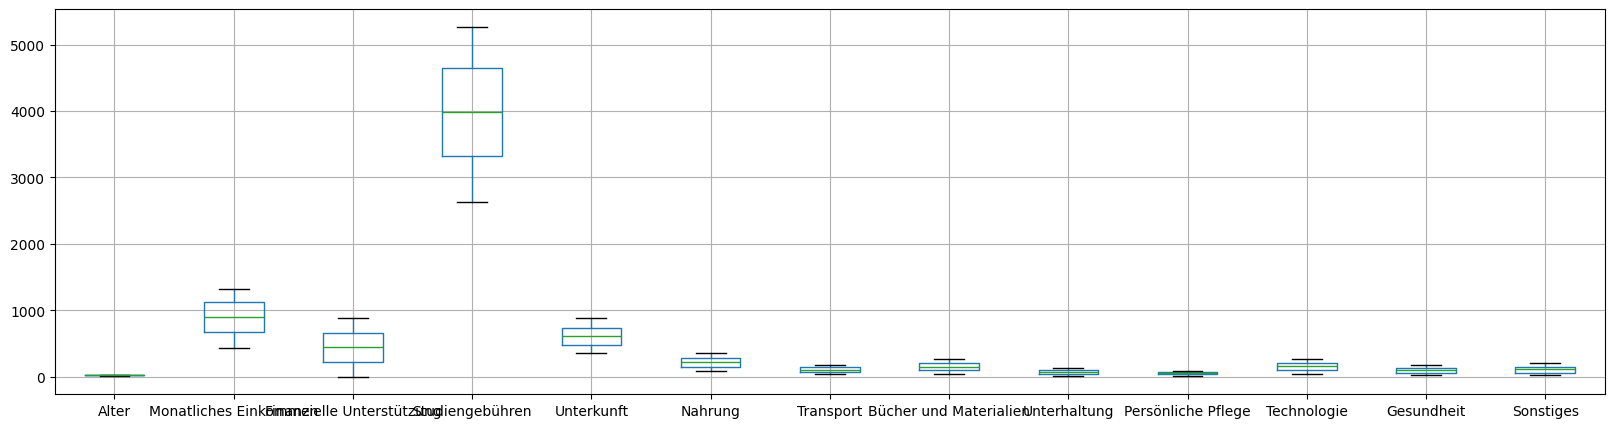

In [25]:
df.boxplot(figsize=(20, 5)) #keine Ausreißer gefunden

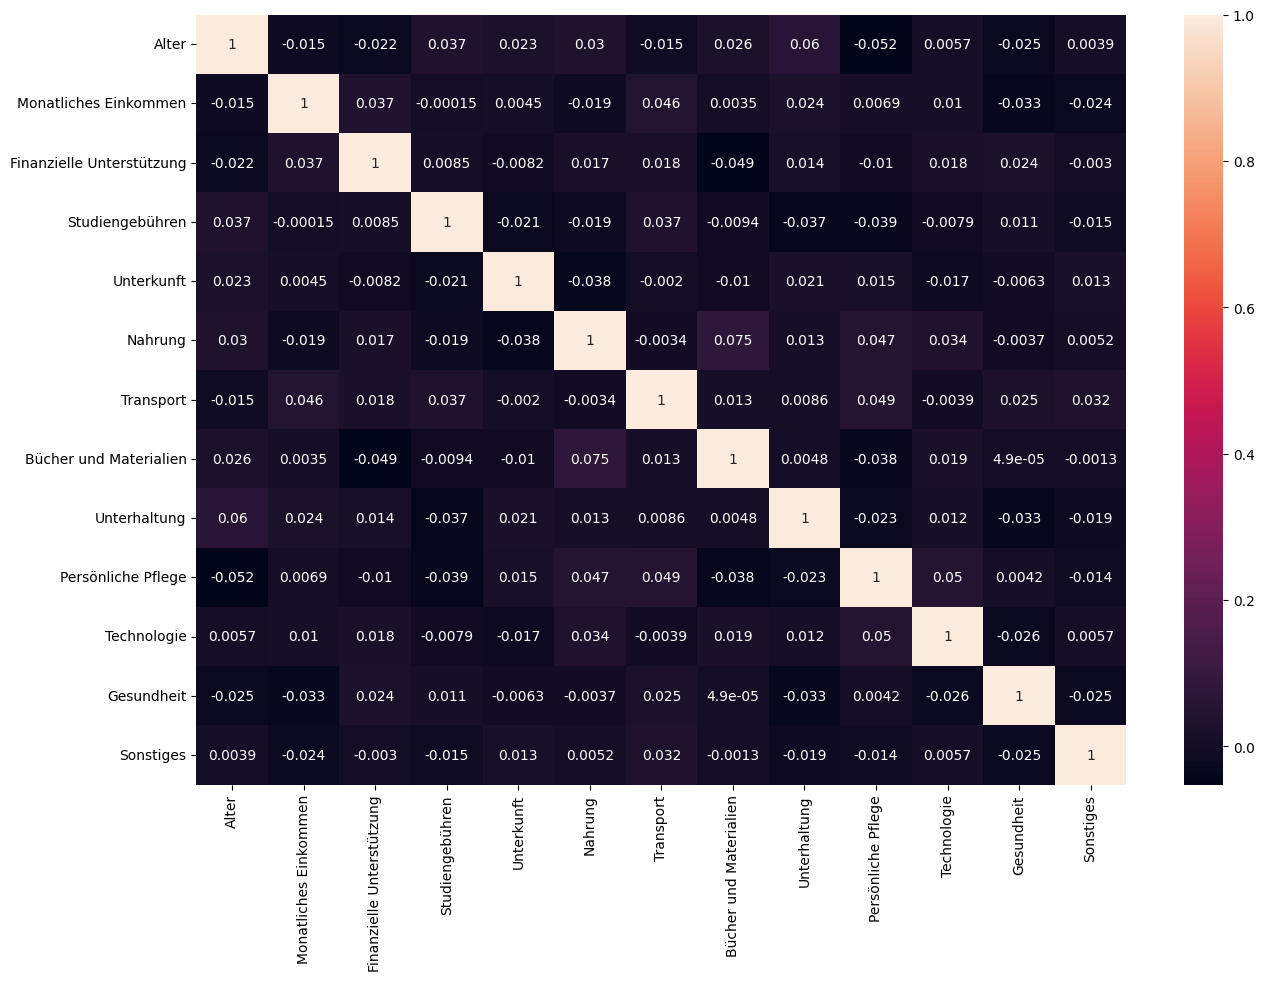

In [26]:
numeric_df = df.select_dtypes(include=[np.number])
matrix = numeric_df.corr() # nur numerische Daten
sns.heatmap(matrix, annot=True)
plt.rcParams['figure.figsize'] = [15, 10]

Das Heatmap zeigt, dass zwischen den untersuchten Variablen keine starken linearen Korrelationen bestehen. Daher wird empfohlen, alternative Analysemethoden anzuwenden, um mögliche Zusammenhänge zu überprüfen.


#Datenanalyse


Es ist sinnvoll, die Daten in Gruppen zu analysieren, um mögliche Zusammenhänge besser erkennen zu können. Daher werden drei neue Gruppen gebildet: Gesamtausgaben, Gesamteinkommen und Ersparniskapazität. Letztere wird dabei helfen, einen möglichen Zusammenhang zwischen Alter und Verschuldung zu untersuchen.

Für die Berechnung der Gesamtausgaben werden alle Ausgaben berücksichtigt, mit Ausnahme der Studiengebühren. Diese werden ausgenommen, da sie oft durch Kredite oder familiäre Unterstützung gedeckt werden können, ohne der Kategorie „Finanzielle Unterstützung“ zugeordnet zu werden.

In [27]:
df['Gesamtausgaben'] = df[['Unterkunft', 'Nahrung', 'Transport', 'Bücher und Materialien', 'Unterhaltung', 'Technologie', 'Sonstiges', 'Gesundheit', 'Persönliche Pflege']].sum(axis=1)
#Neue Säule für einen besseren Überblick
df['Gesamteinkommen'] = df['Monatliches Einkommen'] + df['Finanzielle Unterstützung']
df['Ersparniskapazität'] = df['Gesamteinkommen'] - df['Gesamtausgaben']
df

,Alter,Geschlecht,Studienjahr,Studiengang,Monatliches Einkommen,Finanzielle Unterstützung,Studiengebühren,Unterkunft,Nahrung,Transport,Bücher und Materialien,Unterhaltung,Persönliche Pflege,Technologie,Gesundheit,Sonstiges,Zahlungsmethode,Gesamtausgaben,Gesamteinkommen,Ersparniskapazität
0,19,Divers,1. Jahr,Psychologie,841.0,237.0,5213.8,622.4,259.9,108.0,165.0,36.0,68.5,117.6,111.5,72,Kredit-/Debitkarte,1560.9,1078.0,-482.9
1,24,Weiblich,3. Jahr,Wirtschaftswissenschaft,883.2,768.2,4308.7,489.0,320.4,74.6,221.2,65.0,80.8,198.4,113.2,68,Kredit-/Debitkarte,1630.6,1651.4,20.8
2,24,Divers,3. Jahr,Wirtschaftswissenschaft,644.4,814.7,2678.5,584.7,193.1,120.3,86.9,114.1,20.2,209.8,98.3,133,Bargeld,1560.4,1459.1,-101.3
3,23,Weiblich,4. Jahr,Informatik,541.7,232.6,4332.4,572.4,253.7,100.1,195.8,86.9,26.3,143.1,92.2,55,Mobile Payment,1525.5,774.3,-751.2
4,20,Weiblich,4. Jahr,Informatik,711.1,458.3,3412.4,724.3,326.6,147.5,170.3,42.1,62.3,77.3,62.3,104,Kredit-/Debitkarte,1716.7,1169.4,-547.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,Weiblich,4. Jahr,Biologie,1181.7,456.5,3237.7,850.7,133.4,170.3,132.6,36.9,33.4,221.2,57.1,163,Bargeld,1798.6,1638.2,-160.4
996,19,Weiblich,4. Jahr,Biologie,1235.2,491.6,2967.3,446.0,232.6,45.7,180.8,35.1,86.0,240.5,73.7,135,Mobile Payment,1475.4,1726.8,251.4
997,20,Mähnlich,3. Jahr,Wirtschaftswissenschaft,840.2,345.0,3070.0,634.7,297.6,122.0,60.6,98.3,40.4,249.3,50.0,28,Mobile Payment,1580.9,1185.2,-395.7
998,22,Divers,4. Jahr,Wirtschaftswissenschaft,1030.7,537.3,3203.5,476.7,208.1,108.0,175.6,113.2,79.0,166.8,88.7,65,Mobile Payment,1481.1,1568.0,86.9


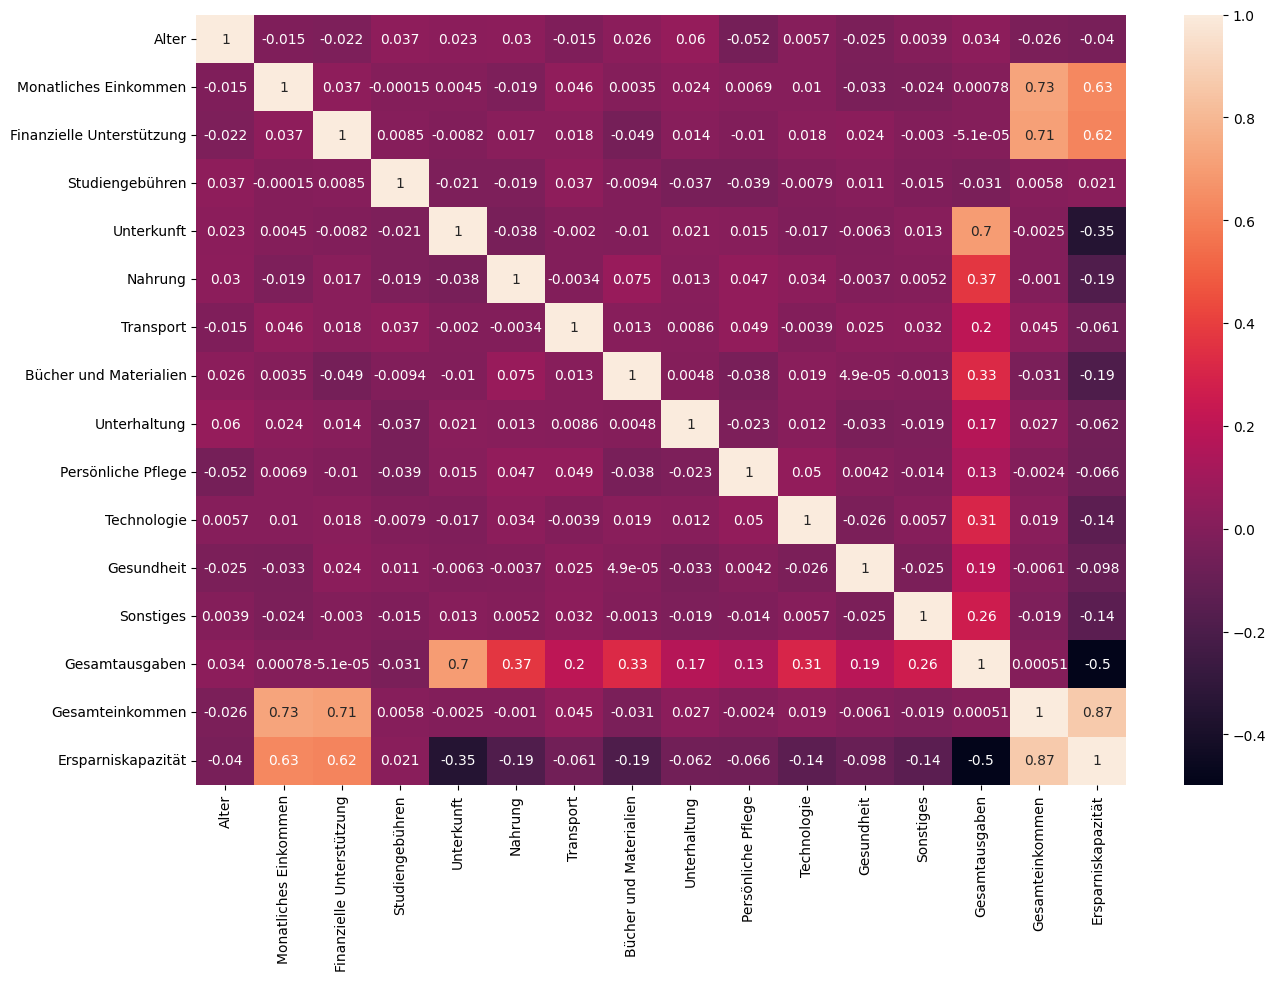

In [28]:
numeric_df = df.select_dtypes(include=[np.number]) #numpy number für numerische Daten
matrix = numeric_df.corr()
sns.heatmap(matrix, annot=True)
plt.rcParams['figure.figsize'] = [15, 10]

Die eingeführten Metriken helfen uns weiterhin nicht, die gestellten Fragen zu beantworten.

## Studiengang vs. Ausgabeverhalten

Die erste Analyse untersucht den Zusammenhang zwischen dem Studiengang und dem Ausgabeverhalten der Studierenden. Ziel ist es herauszufinden, ob Studierende bestimmter Studienrichtungen tendenziell mehr Geld für bestimmte Kategorien ausgeben - zum Beispiel, ob Informatikstudierende höhere Ausgaben für Technologie haben als Studierende anderer Fachrichtungen.

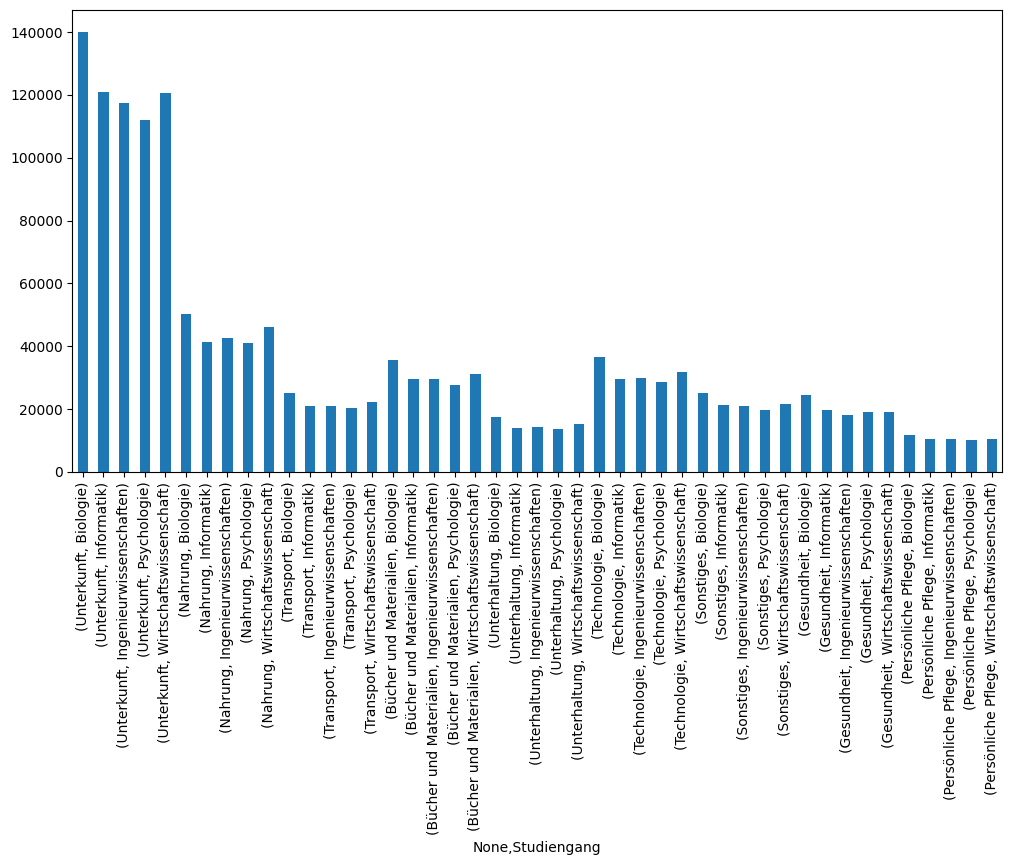

In [44]:
grouped=df.groupby("Studiengang")[['Unterkunft', 'Nahrung', 'Transport', 'Bücher und Materialien', 'Unterhaltung', 'Technologie', 'Sonstiges', 'Gesundheit', 'Persönliche Pflege']].sum().unstack()
grouped.plot(kind='bar', stacked=True, figsize=(12,6))
plt.show()

Es gibt keine dominierenden Ausgaben bei bestimmten Studiengängen.

Eine andere Methode Zusammenhänge zu finden, kann das K-Clustering sein. Ein Modell im Bereich des unüberwachten Lernens.

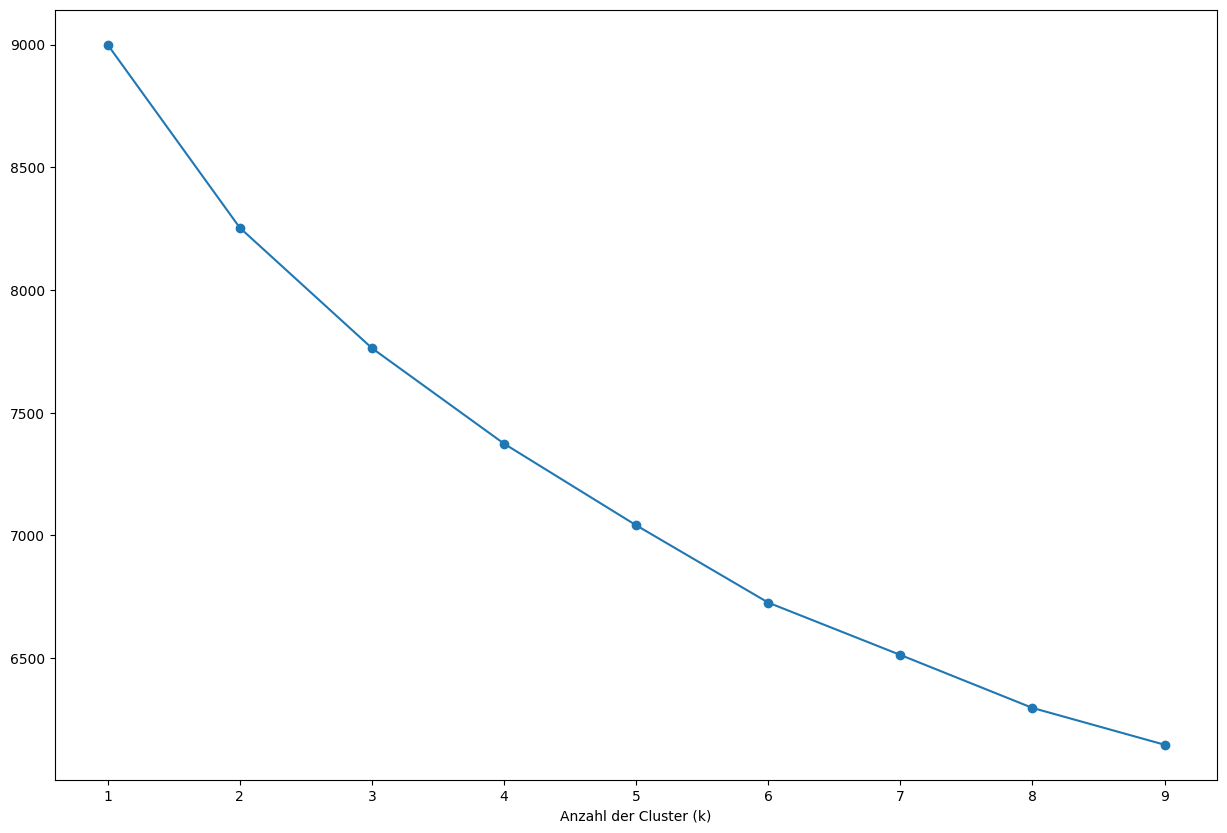

In [43]:
features = df[['Unterkunft', 'Nahrung', 'Transport', 'Bücher und Materialien',
               'Unterhaltung', 'Technologie', 'Sonstiges', 'Gesundheit', 'Persönliche Pflege']]

#Standardisieren, damit alle features im gleichen Bereich liegen
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia, marker='o')
plt.xlabel('Anzahl der Cluster (k)')
plt.show()

Bereits bei der Anwendung der Elbow-Methode zeigt sich, dass zu viele Cluster gebildet werden. In der darauf folgenden Analyse konnten daher keine signifikanten Zusammenhänge festgestellt werden.

## Alter, Zahlungsmethoden und Einsparpotenzial

In dieser Analyse wird nicht nur das Ausgabeverhalten von Studierenden in Zusammenhang mit ihrem Alter untersucht, sondern auch geprüft, ob ein Zusammenhang zwischen dem Alter und der bevorzugten Zahlungsmethode besteht. Es könnte interessant sein, herauszufinden, ob ältere Studierende eher traditionelle Zahlungsmethoden (z. B. Kreditkarten) bevorzugen, während jüngere Studierende möglicherweise eher digitale Zahlungsmethoden nutzen.


###Alter und Ersparniskapazität

Das Regressionsmodell wird gebildet und der F-Test durchgeführt.

**Vermutung**: Ältere Studierende haben mehr Verantwortung für ihre eigenen Finanzen, weshalb jüngere Studierende tendenziell höhere Ausgaben haben und in Folge ein kleineres Einsparpotenzial aufweisen.

**Nullhypothese**: Es besteht kein Zusammenhang zwischen dem Alter und dem Einsparpotenzial der Studierenden. (Alpha wird bei 0.05 für diesen Test bestimmt)


In [38]:
X = sm.add_constant(df['Alter'])
y = df['Ersparniskapazität']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Ersparniskapazität   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.583
Date:                Tue, 29 Apr 2025   Prob (F-statistic):              0.209
Time:                        19:40:17   Log-Likelihood:                -7466.0
No. Observations:                1000   AIC:                         1.494e+04
Df Residuals:                     998   BIC:                         1.495e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -92.7631    125.698     -0.738      0.4

Die Wahrscheinlichkeit liegt bei ungefähr 20%, deswegen kann die Nullhypothese nicht abgelehnt werden.

**Visualisierung:**

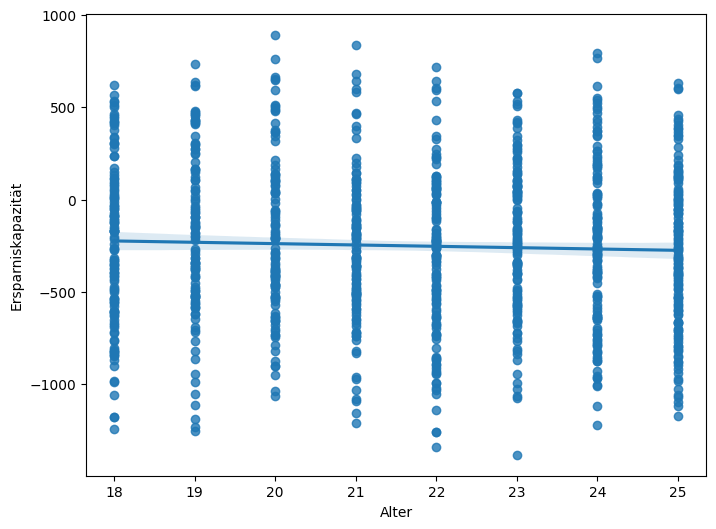

In [39]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='Alter', y='Ersparniskapazität')
plt.show()

###Zahlungsmethode

Für die Analyse der Zahlungsmethode wurde der getrenntes T-Test, weil hier zwei Kategorien vergliechen werden.

**Vermutung**: Jungere Studierende bevorzugen digitale Zahlungsmethoden.

**Nullhypothese**: Es gibt keinen signifikanten Unterschied in der Anzahl der Barzahler und der Debit-/Kreditkartenzahler. (Ein Signifikanzniveau von 0,05 wird für diesen Test verwendet.)

In [40]:
card = df[df['Zahlungsmethode'] == 'Kredit-/Debitkarte']['Alter']
cash = df[df['Zahlungsmethode'] == 'Mobile Payment']['Alter']

t_stat, p_value = stats.ttest_ind(cash, card)

print(f"P-Wert: {p_value}")

P-Wert: 0.38042873168504043


Die Wahrscheinlichkeit liegt bei 38% Prozent, was deutlich höher als unser Alpha-Wert ist. Daher kann die Nullhypothese nicht abgelehnt werden.

## Wohnen vs Transport

**Vermutung**:
„Wohnungen, die näher an der Universität liegen, sind in der Regel teurer. Dennoch wird erwartet, dass je näher man an der Universität wohnt, desto weniger Geld für den öffentlichen Verkehr ausgegeben wird, da der Transportaufwand verringert wird.“

**Nullhypothese**:
„Es gibt keinen Zusammenhang zwischen den Wohnungskosten (insbesondere der Entfernung zur Universität) und den Ausgaben für den öffentlichen Verkehr.“

In [41]:
X = sm.add_constant(df['Unterkunft'])
y = df['Transport']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Transport   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.003903
Date:                Tue, 29 Apr 2025   Prob (F-statistic):              0.950
Time:                        19:40:21   Log-Likelihood:                -5062.3
No. Observations:                1000   AIC:                         1.013e+04
Df Residuals:                     998   BIC:                         1.014e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.7260      5.067     21.656      0.0

Die Wahrscheinlichkeit liegt bei ungefähr 95%, deswegen kann die Nullhypothese nicht abgelehnt werden.

**Visualisierung:**

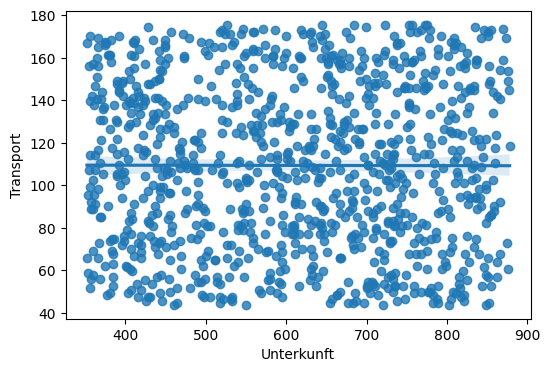

In [42]:
plt.figure(figsize=(6, 4))
sns.regplot(data=df, x='Unterkunft', y='Transport')
plt.show()

In [36]:
#Exportieren für weitere Visualisierung
df.to_excel('Students.xlsx', index=False)

#Zusammenfassung

Die Ergebnisse könnten durch die Natur des Datensatzes beeinflusst sein: Weil die Daten künstlich erstellt wurden, spiegeln sie ein ideales Weltmodell wider, das natürliche Ungleichgewichte oder Ausreißer nicht berücksichtigt.